In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier



%matplotlib inline
sns.set(style="whitegrid")

print("Tüm kütüphaneler yüklendi.")

Tüm kütüphaneler yüklendi.


In [3]:
#DOSYA YOLLARI YÜKLEME KISMI
path_flights = r'C:\Users\mert\Desktop\veriseti\flights.csv'
path_airports = r'C:\Users\mert\Desktop\veriseti\airports.csv'
path_airlines = r'C:\Users\mert\Desktop\veriseti\airlines.csv'

In [4]:
def load_data(path_flights, path_airports, path_airlines):
   
    try:
        df_flights = pd.read_csv(path_flights, low_memory=False)
        print(f"Flights tablosu yüklendi. Boyut: {df_flights.shape}")
        
        df_airports = pd.read_csv(path_airports)
        print(f"Airports tablosu yüklendi. Boyut: {df_airports.shape}")
        
        df_airlines = pd.read_csv(path_airlines)
        print(f"Airlines tablosu yüklendi. Boyut: {df_airlines.shape}")
        
        return df_flights, df_airports, df_airlines
    
    except FileNotFoundError as e:
        print(f"Dosya bulunamadı. ({e})")
        return None, None, None
    except Exception as e:
        print(f"Hata oluştu. ({e})")
        return None, None, None

print("load_data fonksiyonu tanımlandı.")

load_data fonksiyonu tanımlandı.


In [5]:
try: 
    df_flights = pd.read_csv(path_flights, low_memory=False)
    print(f"Flights tablosunun boyutu : {df_flights.shape}")
    df_airports = pd.read_csv(path_airports)
    print(f"Airports tablosunun boyutu : {df_airports.shape}")
    df_airlines = pd.read_csv(path_airlines)
    print(f"Airlines tablosunun boyutu : {df_airlines.shape}")

except FileNotFoundError as e:
    print(f"Dosya bulunamadı. ({e})")

except Exception as e : 
    print(f"Hata oluştu. ({e})")

Flights tablosunun boyutu : (5819079, 31)
Airports tablosunun boyutu : (322, 7)
Airlines tablosunun boyutu : (14, 2)


# airports veri analizi

In [6]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [7]:
df_airports.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [8]:
print("her sütunda bulunan toplam null değer sayısı")
df_airports.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [9]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airports.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    322
AIRPORT      322
CITY         308
STATE         54
COUNTRY        1
LATITUDE     319
LONGITUDE    319
dtype: int64

In [10]:
print("Airports tablosunun ilk 5 satırı: ")
df_airports.head(5)

Airports tablosunun ilk 5 satırı: 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [11]:
print("Airports tablosunun son 5 satırı ")
df_airports.tail(5)

Airports tablosunun son 5 satırı 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023
321,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


# airlines veri analizi


In [12]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [13]:
df_airlines.describe()

,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,UA,United Air Lines Inc.
freq,1,1


In [14]:
print("her sütunda bulunan toplam null değer sayısı")
df_airlines.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRLINE      0
dtype: int64

In [15]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airlines.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    14
AIRLINE      14
dtype: int64

In [16]:
print("Airlines tablosunun ilk 5 satırı ")
df_airlines.head(5)

Airlines tablosunun ilk 5 satırı 


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [17]:
print("Airlines tablosunun son 5 satırı: ")
df_airlines.tail(5)

Airlines tablosunun son 5 satırı: 


,IATA_CODE,AIRLINE
9,DL,Delta Air Lines Inc.
10,EV,Atlantic Southeast Airlines
11,HA,Hawaiian Airlines Inc.
12,MQ,American Eagle Airlines Inc.
13,VX,Virgin America


# flights veri analizi

In [18]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [19]:
df_flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [21]:
print("her sütunda bulunan toplam null değer sayısı")
df_flights.isnull().sum()

her sütunda bulunan toplam null değer sayısı


YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [22]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_flights.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          628
DESTINATION_AIRPORT     629
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64

In [23]:
print("Flights tablosunun ilk 5 satırı ")
df_flights.head(5)

Flights tablosunun ilk 5 satırı 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
print("Flights tablosunun son 5 satırı: ")
df_flights.tail(5)

Flights tablosunun son 5 satırı: 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
def preprocess_pipeline(df_flights_split, df_airlines_full, df_airports_full):
  
    #TABLO BİRLEŞTİRME İŞLEMLERİ
  
    df = pd.merge(df_flights_split, df_airlines_full, left_on='AIRLINE', right_on='IATA_CODE', how='left')
    df.drop('IATA_CODE', axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_ORIGIN'), left_on='ORIGIN_AIRPORT', right_on='IATA_CODE_ORIGIN', how='left')
    df.drop(['IATA_CODE_ORIGIN'], axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_DEST'), left_on='DESTINATION_AIRPORT', right_on='IATA_CODE_DEST', how='left')
    df.drop(['IATA_CODE_DEST'], axis=1, inplace=True)

    # FAZLA NULL DEĞERLER BARINDIRAN SÜTUNLARIN SİLİNMESİ
    high_null_cols = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
    df.drop(columns=high_null_cols, inplace=True)

    #İptal edilen uçuşlar ve yönlendirilen uçuşların kaldırılması.
    
    df = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)].copy()
    df.drop(columns=['CANCELLED', 'DIVERTED'], inplace=True)

    #Amerika'da uçuşlar 15 dakikadan fazla gecikme olduğu zaman uçuş gecikmiş sayıldığı için 'IS_DELAYED' değişkeni oluşturup bunun üzerinden kontrol edeceğiz.
    df['IS_DELAYED'] = (df['ARRIVAL_DELAY'] > 15).astype(int)

    # veri setindeki 'SCHEDULED_DEPARTURE' kısmında saatler normal yazılmamıştır örn: 5,10,15 gibi . Bunu gece sabah öğle akşam ve gece yarısı olarak günün bölümlerine ayırıyoruz.
    df['SCHEDULED_HOUR'] = df['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4).str[:2].astype(int)
    bins = [-1, 5, 11, 16, 20, 23]
    labels = ['Gece (00-05)', 'Sabah (06-11)', 'Öğle (12-16)', 'Akşam (17-20)', 'Gece Yarısı (21-23)']
    df['TIME_OF_DAY'] = pd.cut(df['SCHEDULED_HOUR'], bins=bins, labels=labels, ordered=False)

    silinecek_sutunlar = [
          #sızıntı yapanlar
        'DEPARTURE_TIME',
        'DEPARTURE_DELAY',
        'TAXI_OUT',
        'WHEELS_OFF',
        'ELAPSED_TIME',
        'AIR_TIME',
        'WHEELS_ON',
        'TAXI_IN',
        'ARRIVAL_TIME',
        'ARRIVAL_DELAY',

        #gereksizler hepsi aynı değer
        'YEAR',
        'COUNTRY_ORIGIN',
        'COUNTRY_DEST',
        
        #gürültüye sebebiyet verenler
        'TAIL_NUMBER',        
        'FLIGHT_NUMBER',

        #eklenen zenginleştirmeler
        'AIRLINE_NAME',
        'AIRPORT_ORIGIN',
        'CITY_ORIGIN',
        'STATE_ORIGIN',
        'LATITUDE_ORIGIN',
        'LONGITUDE_ORIGIN',
        'AIRPORT_DEST',
        'CITY_DEST',
        'STATE_DEST',
        'LATITUDE_DEST',
        'LONGITUDE_DEST',


        #gereksiz değişkenler
        'SCHEDULED_DEPARTURE', 
        'SCHEDULED_HOUR', 
        'SCHEDULED_ARRIVAL'
    ]
    df.drop(columns=silinecek_sutunlar, inplace=True)
    
    df.dropna(inplace=True)

    return df

print("preprocess_pipeline fonksiyonu tanımlandı.")

preprocess_pipeline fonksiyonu tanımlandı.


In [26]:
def encode_features(X_train, X_test, y_train):

   #Target encoding yapıyoruz. Yanı havalimanı kodları yerine ortalama gecikme oranı yazılıyor. One hot encoding yapmaya kalksak çok havalimanı kodu olduğundan çok fazla sütun çıkardı o yüzden target encoding en mantıklısı.
    
    target_encode_cols = ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
    ohe_cols = ['AIRLINE', 'TIME_OF_DAY']

    # veri sızıntısını önleme
    train_data_temp = X_train.copy()
    train_data_temp['IS_DELAYED'] = y_train

    for col in target_encode_cols:
        mapping = train_data_temp.groupby(col)['IS_DELAYED'].mean()
        X_train[col + '_ENCODED'] = X_train[col].map(mapping)
        X_test[col + '_ENCODED'] = X_test[col].map(mapping)
        global_mean = y_train.mean()
        X_train[col + '_ENCODED'] = X_train[col + '_ENCODED'].fillna(global_mean)
        X_test[col + '_ENCODED']  = X_test[col + '_ENCODED'].fillna(global_mean)
        
    # ohe 
    X_train = pd.get_dummies(X_train, columns=ohe_cols, prefix=ohe_cols, dtype=int)
    X_test = pd.get_dummies(X_test, columns=ohe_cols, prefix=ohe_cols, dtype=int)

    # sütun hizalama
    train_cols = X_train.columns
    X_test = X_test.reindex(columns=train_cols, fill_value=0)

    # eski sütunları silme
    X_train.drop(columns=target_encode_cols, inplace=True)
    X_test.drop(columns=target_encode_cols, inplace=True)
    
    print("Encoding işlemleri tamamlandı.")
    return X_train, X_test

print("encode_features fonksiyonu tanımlandı.")

encode_features fonksiyonu tanımlandı.


In [31]:
#dosya yolları
BASE_PATH = r'C:/Users/mert/Desktop/veriseti'
path_flights = f'{BASE_PATH}/flights.csv' 
path_airports = f'{BASE_PATH}/airports.csv'
path_airlines = f'{BASE_PATH}/airlines.csv'

#veri yükleme
df_flights, df_airports, df_airlines = load_data(path_flights, path_airports, path_airlines)

if df_flights is not None:
    
    #veriyi test ve train olarak bölme
    
    flights_train, flights_test = train_test_split(df_flights, test_size=0.2, random_state=42)
    print(f"Flights Train boyutu: {flights_train.shape}")
    print(f"Flights Test boyutu: {flights_test.shape}")
    

    df_airlines.rename(columns={'AIRLINE': 'AIRLINE_NAME'}, inplace=True)
    
    print("\nEğitim verisi için proses pipeline fonksiyonu çağırılıyor ")
    train_df = preprocess_pipeline(flights_train, df_airlines, df_airports)
    
    print("Test verisi için proses pipeline fonksiyonu çağırılıyor")
    test_df = preprocess_pipeline(flights_test, df_airlines, df_airports)
    

    print(f"Train Veri Boyutu: {train_df.shape}")
    print(f"Test Veri Boyutu: {test_df.shape}")

else:
    print("Veri yüklenemedi, işlemler durduruldu.")

Flights tablosu yüklendi. Boyut: (5819079, 31)
Airports tablosu yüklendi. Boyut: (322, 7)
Airlines tablosu yüklendi. Boyut: (14, 2)
Flights Train boyutu: (4655263, 31)
Flights Test boyutu: (1163816, 31)

Eğitim verisi için proses pipeline fonksiyonu çağırılıyor 
Test verisi için proses pipeline fonksiyonu çağırılıyor
Train Veri Boyutu: (4571137, 10)
Test Veri Boyutu: (1142871, 10)


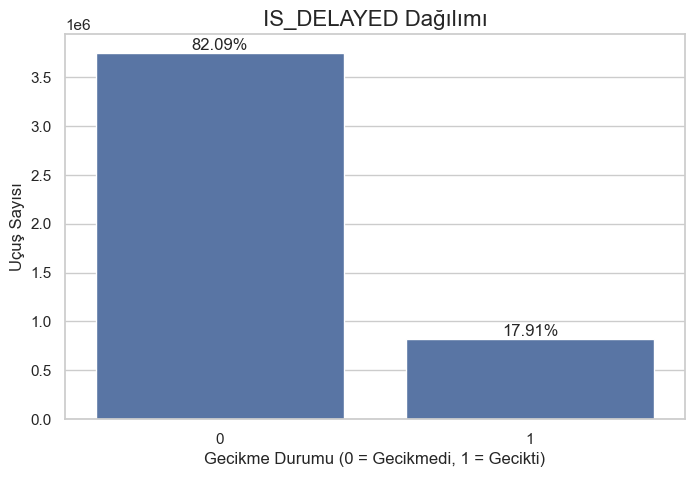


Sayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):


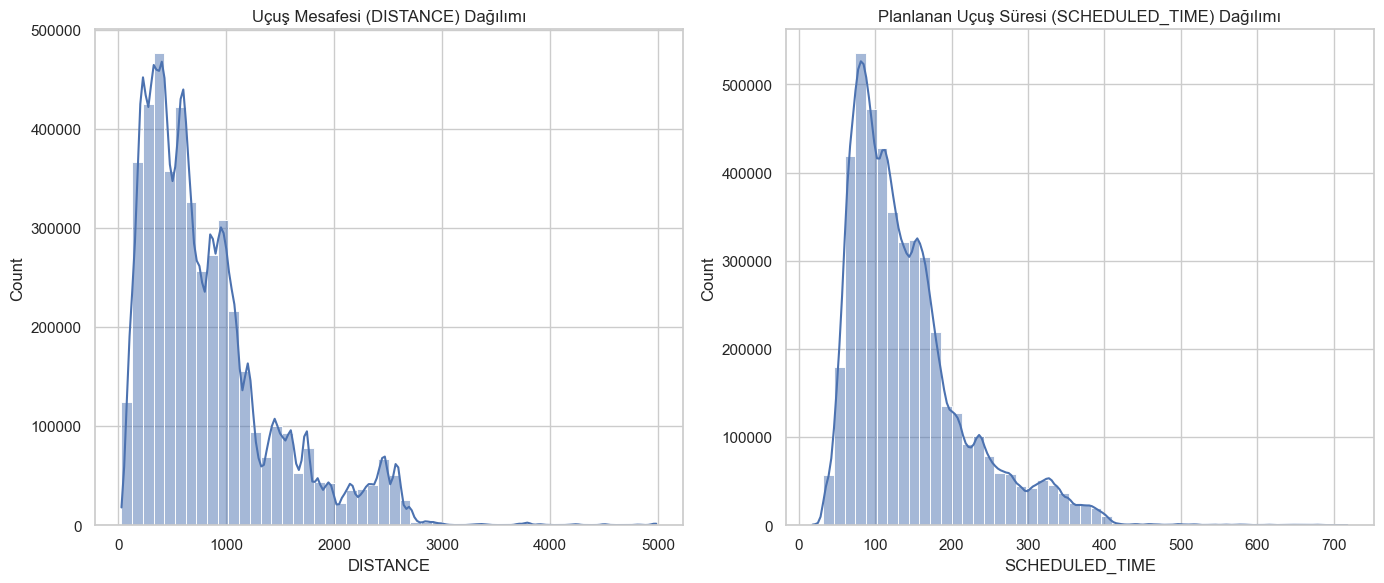


Sayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:


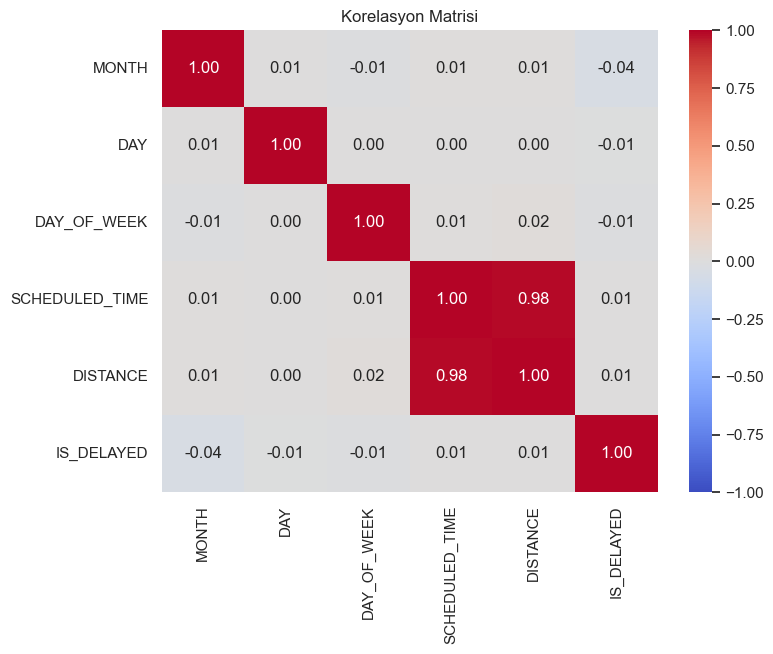

In [32]:
if 'train_df' in locals():
  

    # EDA
    plt.figure(figsize=(8, 5))
    sns.countplot(x='IS_DELAYED', data=train_df)
    plt.title('IS_DELAYED Dağılımı', fontsize=16)
    plt.xlabel('Gecikme Durumu (0 = Gecikmedi, 1 = Gecikti)')
    plt.ylabel('Uçuş Sayısı')
    
    # yüzde hesaplama
    
    total = len(train_df)
    ax = plt.gca()
    for p in ax.patches:
        percentage = f'{(p.get_height() / total * 100):.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
    plt.show()
  


    # Histogram
    
    print(f"\nSayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):")
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(train_df['DISTANCE'], kde=True, bins=50)
    plt.title('Uçuş Mesafesi (DISTANCE) Dağılımı')

    plt.subplot(1, 2, 2)
    sns.histplot(train_df['SCHEDULED_TIME'], kde=True, bins=50)
    plt.title('Planlanan Uçuş Süresi (SCHEDULED_TIME) Dağılımı')
    plt.tight_layout()
    plt.show()


    # Korelasyon

    # numeric_features değişkenini otomatik oluştur
    numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Eğer hedef sütun listede ise çıkar
    if 'IS_DELAYED' in numeric_features:
        numeric_features.remove('IS_DELAYED')
    
    print("\nSayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:")
    
    # Korelasyon matrisi
    corr_df = train_df[numeric_features + ['IS_DELAYED']].dropna().corr()    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Korelasyon Matrisi')
    plt.show()
    

else:
    print("Veriler bulunamadı.")

In [33]:
if 'train_df' in locals():
    # x = özellik, y = hedef oluşturma
    
    X_train = train_df.drop('IS_DELAYED', axis=1)
    y_train = train_df['IS_DELAYED']
    
    X_test = test_df.drop('IS_DELAYED', axis=1)
    y_test = test_df['IS_DELAYED']

    # Encoding
    
    X_train_encoded, X_test_encoded = encode_features(X_train, X_test, y_train)
  
    print(f"Eğitime hazır X_train_encoded boyutu: {X_train_encoded.shape}")
    print(f"Teste hazır X_test_encoded boyutu: {X_test_encoded.shape}")
    
 
    
else:
    print("Veriler bulunamadı.")

Encoding işlemleri tamamlandı.
Eğitime hazır X_train_encoded boyutu: (4571137, 26)
Teste hazır X_test_encoded boyutu: (1142871, 26)


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, average_precision_score, mean_absolute_error

if 'X_train_encoded' in locals() and 'y_test' in locals():
    print("--- BASE MODEL: Dummy Classifier (Stratified) ---")
    
    dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
    
    print("Dummy model istatistikleri öğreniyor...")
    dummy_clf.fit(X_train_encoded, y_train)
    
    print("Tahminler yapılıyor...")
    y_pred_dummy = dummy_clf.predict(X_test_encoded)
    y_proba_dummy = dummy_clf.predict_proba(X_test_encoded)[:, 1]
    
    acc_dummy = accuracy_score(y_test, y_pred_dummy) * 100
    roc_dummy = roc_auc_score(y_test, y_proba_dummy) * 100
    pr_auc_dummy = average_precision_score(y_test, y_proba_dummy) * 100
    mae_dummy = mean_absolute_error(y_test, y_pred_dummy) * 100   # ← EKLENDİ
    
    print(f"\nDummy Model Test Doğruluk Oranı (Accuracy): {acc_dummy:.2f}%")
    print(f"Dummy Model ROC-AUC                  : {roc_dummy:.2f}%")
    print(f"Dummy Model PR-AUC (Average Precision): {pr_auc_dummy:.2f}%")
    print(f"Dummy Model MAE                      : {mae_dummy:.2f}%")
    
    print("\nDummy Model Sınıflandırma Raporu:")
    print(classification_report(y_test, y_pred_dummy, zero_division=0))

else:
    print("Eğitim verileri bulunamadı.")




--- BASELINE MODEL: Dummy Classifier (Stratified) ---
Dummy model istatistikleri öğreniyor...
Tahminler yapılıyor...

Dummy Model Test Doğruluk Oranı (Accuracy): 70.59%
Dummy Model ROC-AUC                  : 49.98%
Dummy Model PR-AUC (Average Precision): 17.90%
Dummy Model MAE                      : 29.41%

Dummy Model Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82    938225
           1       0.18      0.18      0.18    204646

    accuracy                           0.71   1142871
   macro avg       0.50      0.50      0.50   1142871
weighted avg       0.71      0.71      0.71   1142871



In [35]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, average_precision_score, mean_absolute_error

if 'X_train_encoded' in locals() and 'y_train' in locals():
    print("---  Ridge Classifier Base Model  ---")
    
    # Ridge, ölçeklenmiş veri ister
    scaler_base = StandardScaler()
    X_train_base = scaler_base.fit_transform(X_train_encoded)
    X_test_base = scaler_base.transform(X_test_encoded)

    # Model
    ridge_clf = RidgeClassifier(class_weight='balanced', random_state=42)
    
    # Eğit
    ridge_clf.fit(X_train_base, y_train)
    
    # Tahmin
    y_pred_base = ridge_clf.predict(X_test_base)
    y_scores_base = ridge_clf.decision_function(X_test_base)  # olasılık benzeri skor

    # Metrikler
    acc_ridge = accuracy_score(y_test, y_pred_base) * 100
    roc_auc_ridge = roc_auc_score(y_test, y_scores_base) * 100
    pr_auc_ridge = average_precision_score(y_test, y_scores_base) * 100
    mae_ridge = mean_absolute_error(y_test, y_pred_base) * 100   # ← EKLENDİ

    print(f"Base Model Accuracy  : {acc_ridge:.2f}%")
    print(f"Base Model ROC-AUC   : {roc_auc_ridge:.2f}%")
    print(f"Base Model PR-AUC    : {pr_auc_ridge:.2f}%")
    print(f"Base Model MAE       : {mae_ridge:.2f}%")
    print("-" * 30)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_base, zero_division=0))
    print("-" * 30)

else:
    print("Hata: X_train_encoded bulunamadı.")


---  Ridge Classifier Base Model  ---
Base Model Accuracy  : 58.82%
Base Model ROC-AUC   : 63.56%
Base Model PR-AUC    : 26.07%
Base Model MAE       : 41.18%
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.58      0.70    938225
           1       0.24      0.62      0.35    204646

    accuracy                           0.59   1142871
   macro avg       0.56      0.60      0.52   1142871
weighted avg       0.76      0.59      0.64   1142871

------------------------------


In [36]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    average_precision_score,
    mean_absolute_error,   # <-- MAE eklendi
)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

if 'X_train_encoded' in locals() and 'X_test_encoded' in locals():
    print("--- FEATURE SELECTION: SelectKBest (ANOVA F) + Dummy & Ridge Classifier ---")

    #  Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_encoded)
    X_test_scaled = scaler.transform(X_test_encoded)

    #  SelectKBest
    print("ANOVA F-Value ile en iyi 10 özellik seçiliyor...")

    selector = SelectKBest(score_func=f_classif, k=10)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)

    selected_mask = selector.get_support()
    selected_features = X_train_encoded.columns[selected_mask]

    print(f"\nToplam özellik sayısı: {X_train_encoded.shape[1]}")
    print(f"Seçilen özellik sayısı: {len(selected_features)}\n")
    print("Seçilen Özellikler:")
    for i, f in enumerate(selected_features, 1):
        print(f"{i}. {f}")

    #  Dummy Classifier (stratified)
    print("\n--- FS Sonrası MODEL 1: DummyClassifier (stratified) ---")

    dummy_fs = DummyClassifier(strategy="stratified", random_state=42)
    dummy_fs.fit(X_train_selected, y_train)

    y_pred_dummy_fs = dummy_fs.predict(X_test_selected)
    y_proba_dummy_fs = dummy_fs.predict_proba(X_test_selected)[:, 1]

    acc_dummy_fs = accuracy_score(y_test, y_pred_dummy_fs)
    auc_dummy_fs = roc_auc_score(y_test, y_proba_dummy_fs)
    pr_dummy_fs = average_precision_score(y_test, y_proba_dummy_fs)
    mae_dummy_fs = mean_absolute_error(y_test, y_pred_dummy_fs)

    print(f"Dummy Accuracy: {acc_dummy_fs * 100:.2f}%")
    print(f"Dummy ROC-AUC : {auc_dummy_fs * 100:.2f}%")
    print(f"Dummy PR-AUC  : {pr_dummy_fs * 100:.2f}%")
    print(f"Dummy MAE     : {mae_dummy_fs * 100:.2f}%")  # 0-1 label için hata oranı

    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred_dummy_fs, zero_division=0))

    #  Ridge Classifier
    print("\n--- FS Sonrası MODEL 2: Ridge Classifier ---")

    ridge_fs = RidgeClassifier(class_weight='balanced', random_state=42)
    ridge_fs.fit(X_train_selected, y_train)

    y_pred_ridge_fs = ridge_fs.predict(X_test_selected)
    y_scores_ridge_fs = ridge_fs.decision_function(X_test_selected)

    acc_ridge_fs = accuracy_score(y_test, y_pred_ridge_fs)
    auc_ridge_fs = roc_auc_score(y_test, y_scores_ridge_fs)
    pr_ridge_fs = average_precision_score(y_test, y_scores_ridge_fs)
    mae_ridge_fs = mean_absolute_error(y_test, y_pred_ridge_fs)

    print(f"Ridge Accuracy: {acc_ridge_fs * 100:.2f}%")
    print(f"Ridge ROC-AUC : {auc_ridge_fs * 100:.2f}%")
    print(f"Ridge PR-AUC  : {pr_ridge_fs * 100:.2f}%")
    print(f"Ridge MAE     : {mae_ridge_fs * 100:.2f}%")  # yine 0-1 label için hata oranı

    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred_ridge_fs, zero_division=0))

else:
    print("HATA: Gerekli veriler bulunamadı.")


--- FEATURE SELECTION: SelectKBest (ANOVA F) + Dummy & Ridge Classifier ---
ANOVA F-Value ile en iyi 10 özellik seçiliyor...

Toplam özellik sayısı: 26
Seçilen özellik sayısı: 10

Seçilen Özellikler:
1. MONTH
2. ORIGIN_AIRPORT_ENCODED
3. DESTINATION_AIRPORT_ENCODED
4. AIRLINE_DL
5. AIRLINE_NK
6. TIME_OF_DAY_Gece (00-05)
7. TIME_OF_DAY_Sabah (06-11)
8. TIME_OF_DAY_Öğle (12-16)
9. TIME_OF_DAY_Akşam (17-20)
10. TIME_OF_DAY_Gece Yarısı (21-23)

--- FS Sonrası MODEL 1: DummyClassifier (stratified) ---
Dummy Accuracy: 70.59%
Dummy ROC-AUC : 49.98%
Dummy PR-AUC  : 17.90%
Dummy MAE     : 29.41%

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.82      0.82    938225
           1       0.18      0.18      0.18    204646

    accuracy                           0.71   1142871
   macro avg       0.50      0.50      0.50   1142871
weighted avg       0.71      0.71      0.71   1142871


--- FS Sonrası MODEL 2: Ridge Classifier ---
Ridge Ac

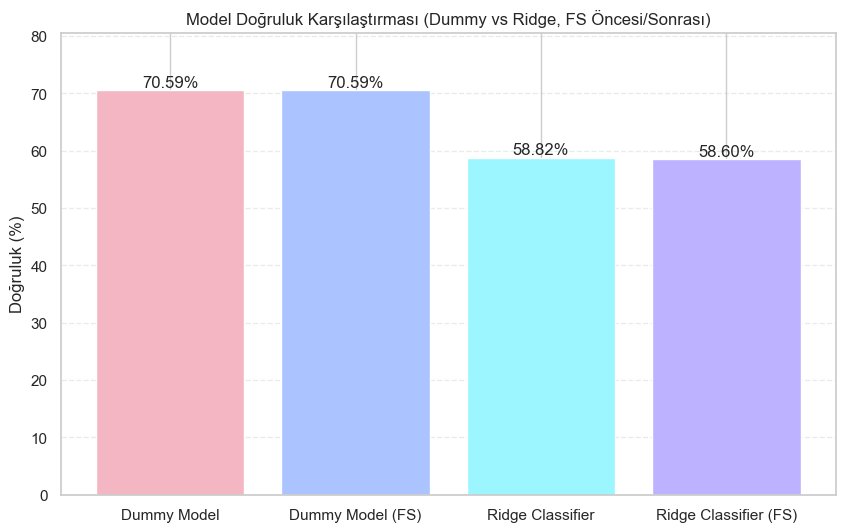

In [ ]:
# Yeni modellerin doğruluk skorları
dummy_acc      = accuracy_score(y_test, y_pred_dummy) * 100
dummy_fs_acc   = accuracy_score(y_test, y_pred_dummy_fs) * 100
ridge_acc      = accuracy_score(y_test, y_pred_base) * 100
ridge_fs_acc   = accuracy_score(y_test, y_pred_ridge_fs) * 100

# Model isimleri
model_names = [
    "Dummy Model",
    "Dummy Model (FS)",
    "Ridge Classifier",
    "Ridge Classifier (FS)"
]

# Skorlar
accuracies = [
    dummy_acc,
    dummy_fs_acc,
    ridge_acc,
    ridge_fs_acc
]


colors = ["#f4b6c2", "#abc4ff", "#9bf6ff", "#bdb2ff"]


plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=colors)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        f"{height:.2f}%",
        ha='center',
        fontsize=12
    )

plt.ylabel("Doğruluk (%)")
plt.title("Model Doğruluk Karşılaştırması (Dummy vs Ridge, FS Öncesi/Sonrası)")
plt.ylim(0, max(accuracies) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    roc_auc_score, 
    average_precision_score,
    mean_absolute_error,   
)

if 'X_train_encoded' in locals() and 'X_test_encoded' in locals() and 'y_train' in locals() and 'y_test' in locals():
    print("--- BOYUT İNDİRGEME: Truncated SVD + Dummy & Ridge ---")
    
    #  ÖLÇEKLEME
    print("Veri ölçeklendiriliyor...")
    scaler_svd = StandardScaler()
    X_train_scaled = scaler_svd.fit_transform(X_train_encoded)
    X_test_scaled = scaler_svd.transform(X_test_encoded)
    
    #  Truncated SVD (10 bileşen)
    print("TruncatedSVD uygulanıyor (n_components=10)...")
    svd = TruncatedSVD(n_components=10, random_state=42)
    X_train_svd = svd.fit_transform(X_train_scaled)
    X_test_svd = svd.transform(X_test_scaled)
    
    print(f"\nSVD sonrası yeni X_train boyutu: {X_train_svd.shape}")
    print(f"İlk 10 bileşenin açıkladığı toplam varyans oranı: {svd.explained_variance_ratio_.sum():.4f}")
    
    #  MODEL 1: DummyClassifier (stratified)
    print("\n--- SVD Sonrası MODEL 1: DummyClassifier (stratified) ---")
    
    dummy_svd = DummyClassifier(strategy="stratified", random_state=42)
    dummy_svd.fit(X_train_svd, y_train)
    
    y_pred_dummy_svd = dummy_svd.predict(X_test_svd)
    y_proba_dummy_svd = dummy_svd.predict_proba(X_test_svd)[:, 1]
    
    acc_dummy_svd = accuracy_score(y_test, y_pred_dummy_svd) * 100
    auc_dummy_svd = roc_auc_score(y_test, y_proba_dummy_svd) * 100
    pr_dummy_svd  = average_precision_score(y_test, y_proba_dummy_svd) * 100
    mae_dummy_svd = mean_absolute_error(y_test, y_pred_dummy_svd) * 100  # 0-1 için hata oranı

    print(f"Dummy (SVD) Accuracy: {acc_dummy_svd:.2f}%")
    print(f"Dummy (SVD) ROC-AUC : {auc_dummy_svd:.2f}%")
    print(f"Dummy (SVD) PR-AUC  : {pr_dummy_svd:.2f}%")
    print(f"Dummy (SVD) MAE     : {mae_dummy_svd:.2f}%")
    print("\nDummy (SVD) Classification Report:\n")
    print(classification_report(y_test, y_pred_dummy_svd, zero_division=0))
    
    #  MODEL 2: Ridge Classifier
    print("\n--- SVD Sonrası MODEL 2: Ridge Classifier ---")
    
    ridge_svd = RidgeClassifier(class_weight='balanced', random_state=42)
    ridge_svd.fit(X_train_svd, y_train)
    
    y_pred_ridge_svd = ridge_svd.predict(X_test_svd)
    y_scores_ridge_svd = ridge_svd.decision_function(X_test_svd)
    
    acc_ridge_svd = accuracy_score(y_test, y_pred_ridge_svd) * 100
    auc_ridge_svd = roc_auc_score(y_test, y_scores_ridge_svd) * 100
    pr_ridge_svd  = average_precision_score(y_test, y_scores_ridge_svd) * 100
    mae_ridge_svd = mean_absolute_error(y_test, y_pred_ridge_svd) * 100  # yine hata oranı

    print(f"Ridge (SVD) Accuracy: {acc_ridge_svd:.2f}%")
    print(f"Ridge (SVD) ROC-AUC : {auc_ridge_svd:.2f}%")
    print(f"Ridge (SVD) PR-AUC  : {pr_ridge_svd:.2f}%")
    print(f"Ridge (SVD) MAE     : {mae_ridge_svd:.2f}%")
    print("\nRidge (SVD) Classification Report:\n")
    print(classification_report(y_test, y_pred_ridge_svd, zero_division=0))

else:
    print("Eğitim / test verileri veya hedef değişkenler bulunamadı.")


--- BOYUT İNDİRGEME: Truncated SVD + Dummy & Ridge ---
Veri ölçeklendiriliyor...
TruncatedSVD uygulanıyor (n_components=10)...

SVD sonrası yeni X_train boyutu: (4571137, 10)
İlk 10 bileşenin açıkladığı toplam varyans oranı: 0.5360

--- SVD Sonrası MODEL 1: DummyClassifier (stratified) ---
Dummy (SVD) Accuracy: 70.59%
Dummy (SVD) ROC-AUC : 49.98%
Dummy (SVD) PR-AUC  : 17.90%
Dummy (SVD) MAE     : 29.41%

Dummy (SVD) Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.82      0.82    938225
           1       0.18      0.18      0.18    204646

    accuracy                           0.71   1142871
   macro avg       0.50      0.50      0.50   1142871
weighted avg       0.71      0.71      0.71   1142871


--- SVD Sonrası MODEL 2: Ridge Classifier ---
Ridge (SVD) Accuracy: 58.09%
Ridge (SVD) ROC-AUC : 62.94%
Ridge (SVD) PR-AUC  : 25.63%
Ridge (SVD) MAE     : 41.91%

Ridge (SVD) Classification Report:

              precision    re

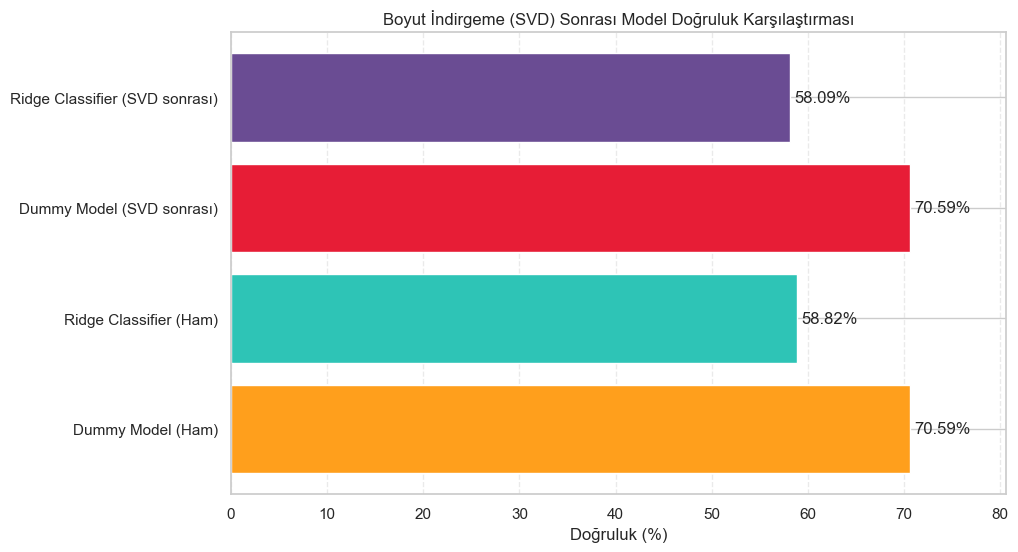

In [ ]:




# Accuracy skorları (yüzdelik)
dummy_raw_acc   = dummy_acc          # Ham Dummy
ridge_raw_acc   = ridge_acc          # Ham Ridge
dummy_svd_acc   = acc_dummy_svd      # SVD sonrası Dummy
ridge_svd_acc   = acc_ridge_svd      # SVD sonrası Ridge

# Model isimleri
model_names = [
    "Dummy Model (Ham)",
    "Ridge Classifier (Ham)",
    "Dummy Model (SVD sonrası)",
    "Ridge Classifier (SVD sonrası)"
]

# Değerler
accuracies = [
    dummy_raw_acc,
    ridge_raw_acc,
    dummy_svd_acc,
    ridge_svd_acc
]


colors = ["#ff9f1c", "#2ec4b6", "#e71d36", "#6a4c93"]


plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, accuracies, color=colors)


for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.5,
        bar.get_y() + bar.get_height()/2,
        f"{width:.2f}%",
        va="center",
        fontsize=12
    )

plt.xlabel("Doğruluk (%)")
plt.title("Boyut İndirgeme (SVD) Sonrası Model Doğruluk Karşılaştırması")
plt.xlim(0, max(accuracies) + 10)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.show()


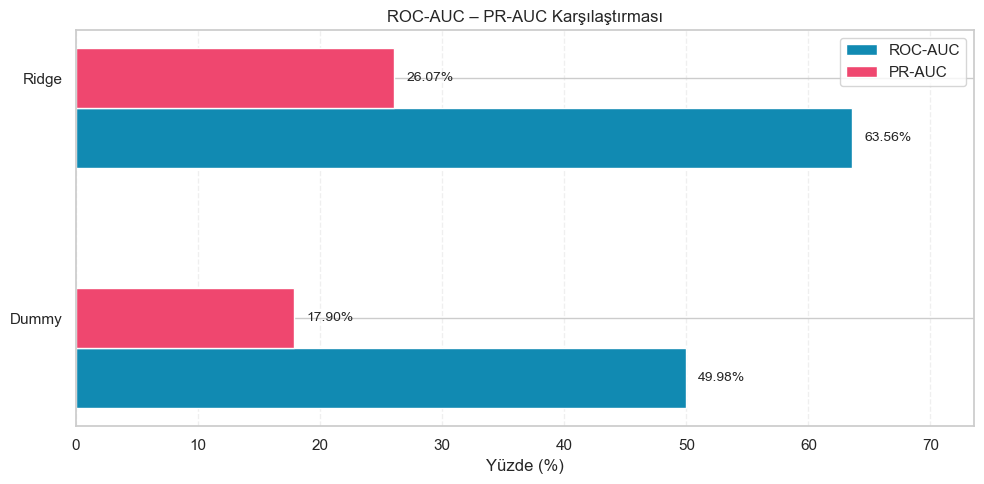

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dummy_roc_auc  = roc_dummy 
dummy_pr_auc   = pr_auc_dummy

ridge_roc_auc  = roc_auc_ridge 
ridge_pr_auc   = pr_auc_ridge


metric_matrix = np.array([
    [dummy_roc_auc, dummy_pr_auc],
    [ridge_roc_auc, ridge_pr_auc]
])

models = ["Dummy", "Ridge"]
metrics = [ "ROC-AUC", "PR-AUC"]


colors = ["#118ab2", "#ef476f", "#06d6a0"]  



plt.figure(figsize=(10, 5))

bar_width = 0.25
y_pos = np.arange(len(models))

for i in range(len(metrics)):
    plt.barh(
        y_pos + i * bar_width,
        metric_matrix[:, i],
        height=bar_width,
        label=metrics[i],
        color=colors[i]
    )


for i in range(len(metrics)):
    for j in range(len(models)):
        value = metric_matrix[j, i]
        plt.text(
            value + 1,
            j + i * bar_width,
            f"{value:.2f}%",
            va="center",
            fontsize=10
        )

plt.xlabel("Yüzde (%)")
plt.title("ROC-AUC – PR-AUC Karşılaştırması")
plt.yticks(y_pos + bar_width, models)
plt.xlim(0, metric_matrix.max() + 10)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()



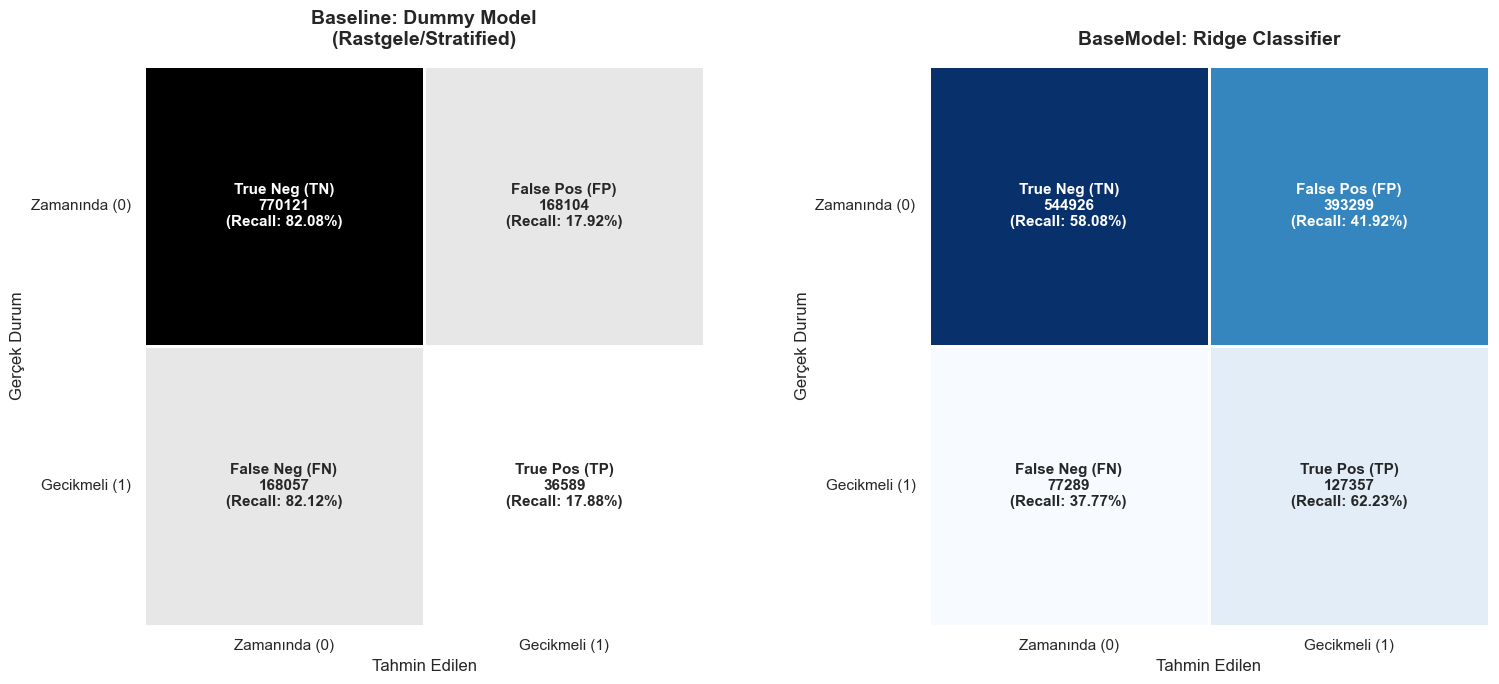


Grafik Açıklaması:
- True Neg (TN): Zamanında olacağı doğru tahmin edildi.
- False Pos (FP): Zamanında olacağı sanıldı ama Gecikti (Hata).
- False Neg (FN): Gecikeceği sanıldı ama Zamanında kalktı (Hata).
- True Pos (TP): Gecikeceği doğru tahmin edildi (Kritik Başarı).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_beautiful_confusion_matrix(y_true, y_pred, title, ax, cmap='Blues'):
    """
    Şık ve detaylı bir Confusion Matrix çizer.
    Hem sayıları hem de yüzdeleri gösterir.
    """
    cm = confusion_matrix(y_true, y_pred)
    
    
    with np.errstate(divide='ignore', invalid='ignore'):
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        cm_percent = np.nan_to_num(cm_percent)
    
    
    group_names = ['True Neg (TN)', 'False Pos (FP)', 'False Neg (FN)', 'True Pos (TP)']
    
    
    group_counts = [f"{value:0.0f}" for value in cm.flatten()]
    group_percentages = [f"{value:.2%}" for value in cm_percent.flatten()]
    
    
    labels = [f"{v1}\n{v2}\n(Recall: {v3})" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    
    sns.heatmap(cm, annot=labels, fmt='', cmap=cmap, cbar=False, ax=ax, 
                annot_kws={"size": 11, "weight": "bold"}, square=True, linewidths=2, linecolor='white')
    
    ax.set_title(title, fontsize=14, weight='bold', pad=15)
    ax.set_xlabel('Tahmin Edilen', fontsize=12)
    ax.set_ylabel('Gerçek Durum', fontsize=12)
    ax.set_xticklabels(['Zamanında (0)', 'Gecikmeli (1)'], fontsize=11)
    ax.set_yticklabels(['Zamanında (0)', 'Gecikmeli (1)'], fontsize=11, rotation=0)



if 'y_test' in locals() and 'y_pred_base' in locals() and 'y_pred_dummy' in locals():
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # 1. Grafik: Dummy Model (Karşılaştırma için)
    plot_beautiful_confusion_matrix(
        y_test, 
        y_pred_dummy, 
        title="Baseline: Dummy Model\n(Rastgele/Stratified)", 
        ax=axes[0],
        cmap='Greys' # Gri tonlama
    )
    
    # 2. Grafik: Ridge Classifier (Base Model veya FS Model)
    
    plot_beautiful_confusion_matrix(
        y_test, 
        y_pred_base, 
        title="BaseModel: Ridge Classifier", 
        ax=axes[1],
        cmap='Blues' # Mavi tonlama
    )
    
    plt.tight_layout()
    plt.show()
    
    print("\nGrafik Açıklaması:")
    print("- True Neg (TN): Zamanında olacağı doğru tahmin edildi.")
    print("- False Pos (FP): Zamanında olacağı sanıldı ama Gecikti (Hata).")
    print("- False Neg (FN): Gecikeceği sanıldı ama Zamanında kalktı (Hata).")
    print("- True Pos (TP): Gecikeceği doğru tahmin edildi (Kritik Başarı).")

else:
    print("HATA: Gerekli tahmin değişkenleri (y_pred_base vb.) hafızada bulunamadı. Lütfen önceki hücreleri çalıştırın.")